# Second task
In this project, I used random forest model to analyze a dataset with cross validation (10-fold). 

## Part 1: Data exploration

### Understand raw data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)# display all the columns
raw_data = pd.read_csv('a_20s_1600her_0.4__maf_0.2_EDM-2_01.txt', sep = "\t")# read in dataset

In [2]:
raw_data.head() # show first 5 rows of the dataset

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,M0P0,M0P1,Class
0,0,0,0,0,0,0,0,2,0,0,1,2,1,2,1,0,1,0,1,1,1
1,1,0,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1,1,1,1
2,0,0,0,1,0,0,0,2,0,0,0,1,0,1,1,0,0,0,0,0,1
3,0,0,0,1,2,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1
4,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1


In [3]:
print ("Number of rows: " + str(raw_data.shape[0])) # row count
print ("Number of columns: " + str(raw_data.shape[1])) # column count

Number of rows: 1600
Number of columns: 21


In [4]:
raw_data.describe() # descriptive statistics 

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,M0P0,M0P1,Class
count,1600.000000,1600.00000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000
mean,0.222500,0.41250,0.21750,0.890625,0.888125,0.142500,0.335625,1.024375,0.114375,0.595000,0.688750,0.875000,0.798750,0.85375,0.791875,0.281250,0.682500,0.33000,0.396875,0.426250,0.500000
std,0.439448,0.55343,0.43768,0.687537,0.706874,0.358503,0.523834,0.675697,0.328041,0.652872,0.666822,0.702448,0.701645,0.68202,0.678304,0.481968,0.680612,0.51601,0.561972,0.576427,0.500156
min,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,0.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.500000
75%,0.000000,1.00000,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,2.000000,2.00000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000


In [5]:
raw_data.isnull().values.any() # check missing data

False

### Understand the features

Text(0,0.5,'Count')

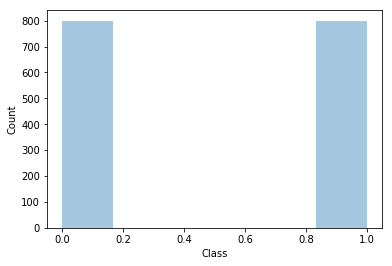

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.distplot(raw_data['Class'],kde=False) # The outcome is labeled as 'class'
plt.ylabel("Count")

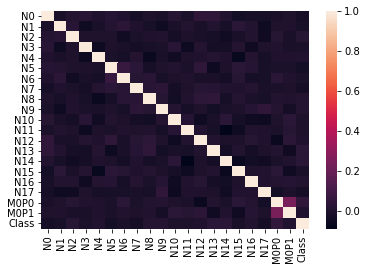

In [7]:
# Use heat map to visualize correlation between each column
corr = raw_data[['N0','N1','N2','N3','N4','N5','N6','N7','N8','N9','N10','N11','N12','N13','N14','N15','N16','N17','M0P0','M0P1','Class']].corr()
sb.heatmap(corr)

In [8]:
# From heat map, we can not see strong correlation between feature and 'class'

In [9]:
corr

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,M0P0,M0P1,Class
N0,1.000000,-0.009900,0.018111,0.030919,0.005693,0.020920,0.006839,-0.022489,0.001226,-0.006147,0.027328,-0.007091,0.052015,0.048128,0.012782,-0.026944,-0.014574,-0.020629,-0.013390,0.000630,-0.022763
N1,-0.009900,1.000000,0.029562,-0.044069,-0.013049,0.018755,0.039882,0.004871,-0.015458,-0.046214,-0.012837,0.015283,-0.011556,0.012468,-0.016056,0.036048,0.012535,-0.045551,0.000126,0.003284,-0.015815
N2,0.018111,0.029562,1.000000,0.000130,0.001885,0.001634,-0.037636,-0.007364,0.005216,0.008623,-0.025039,-0.005085,-0.010111,-0.019076,-0.037017,-0.011488,0.013625,-0.041093,0.027683,-0.013225,0.025712
N3,0.030919,-0.044069,0.000130,1.000000,-0.050929,-0.005233,-0.010880,-0.023874,-0.016594,-0.008185,0.029371,-0.051635,0.016570,-0.024798,-0.024704,0.017398,-0.042182,-0.000441,0.007208,-0.011687,-0.008184
N4,0.005693,-0.013049,0.001885,-0.050929,1.000000,-0.006151,-0.018449,0.017497,-0.058058,-0.011512,-0.038097,-0.004251,0.005014,0.019226,0.004886,-0.061781,0.017116,-0.020455,0.004787,0.005063,0.007960
N5,0.020920,0.018755,0.001634,-0.005233,-0.006151,1.000000,0.074854,0.034705,-0.021683,0.000908,0.015605,-0.008692,0.046952,-0.050273,-0.001408,0.035742,0.024067,-0.017715,-0.007722,-0.006613,-0.027903
N6,0.006839,0.039882,-0.037636,-0.010880,-0.018449,0.074854,1.000000,0.026345,0.031228,-0.017400,-0.005118,0.010410,-0.010088,-0.011315,-0.025058,0.024693,-0.020177,-0.016681,0.033732,0.008500,-0.008354
N7,-0.022489,0.004871,-0.007364,-0.023874,0.017497,0.034705,0.026345,1.000000,0.029736,0.040821,-0.023403,-0.000165,0.027502,0.024025,0.009711,0.003901,0.016839,-0.012322,-0.005728,-0.002607,-0.023132
N8,0.001226,-0.015458,0.005216,-0.016594,-0.058058,-0.021683,0.031228,0.029736,1.000000,0.026617,-0.034426,0.010517,0.043008,0.046860,-0.022241,0.017924,-0.008116,-0.016219,0.014831,0.009910,0.017153
N9,-0.006147,-0.046214,0.008623,-0.008185,-0.011512,0.000908,-0.017400,0.040821,0.026617,1.000000,0.016247,-0.020455,-0.000560,-0.029172,-0.009695,-0.003478,0.021477,0.049825,0.019048,-0.024578,0.017237


## Part 2: Feature Preprocessing
In this part, I decide to keep all the features.

In [10]:
y = raw_data.iloc[:, -1].values
X = raw_data.iloc[:, :-1].values

In [11]:
# Scale the data: used to standardize the range of independent variables or features of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))

Feature space holds 1600 observations and 20 features
Unique target labels: [0 1]


## Part 3: Model Training and Result Evaluation

### K-fold Cross-Validation

In [12]:
from sklearn.cross_validation import KFold

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
# This function does 10-fold. It saves the result at each time as different parts of y_pred. 
# In the end, it returns the y_pred as the result of all the 10-fold.
def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=10,shuffle=True) # Total number of elements；Number of folds， default=3；Whether to shuffle the data before splitting into batches
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

### Run Random Forest Model and Calculate Accuracy

In [14]:
from sklearn.ensemble import RandomForestClassifier

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
# This function calculates accuracy
def accuracy(y_true,y_pred):
    return np.mean(y_true == y_pred) # NumPy interpretes True and False as 1. and 0.

In [16]:
RF_CV_result = run_cv(X,y,RandomForestClassifier)

In [17]:
print ("Random forest accuracy: " + str(accuracy(y, RF_CV_result)))

Random forest accuracy: 0.67875


### Classification Report

In [18]:
# Precision is the ability of a classiifer not to label an instance positive that is actually negative.  
# Recall is the ability of a classifier to find all positive instances.  
# F1 score conveys the balance between the precision and the recall
# Support is the number of actual occurrences of the class in the specified dataset. 
from sklearn.metrics import classification_report
report = classification_report(y, RF_CV_result)
print (report)

             precision    recall  f1-score   support

          0       0.66      0.75      0.70       800
          1       0.71      0.61      0.65       800

avg / total       0.68      0.68      0.68      1600



## Part 4: Random Forest Model - Feature Importance 

In [19]:
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

In [20]:
feature_name = []
importance = []
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), raw_data.columns), reverse=True):
    print (v + ": " + str(k))
    feature_name.append(k)
    importance.append(v)

Feature importance ranking by Random Forest Model:
M0P1: 0.2785
M0P0: 0.0589
N14: 0.0511
N13: 0.0504
N4: 0.0466
N10: 0.0445
N7: 0.0431
N11: 0.0429
N16: 0.0426
N9: 0.0419
N12: 0.0419
N3: 0.0403
N6: 0.0331
N17: 0.0315
N1: 0.0315
N15: 0.0299
N2: 0.0261
N0: 0.026
N5: 0.0205
N8: 0.0187


Text(0,0.5,'Importance')

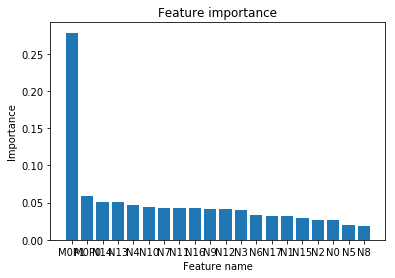

In [21]:
plt.bar(importance,feature_name)
plt.title("Feature importance")
plt.xlabel("Feature name")
plt.ylabel("Importance")

## Part 5: Use Probabilities as Prediction Results
RandomForestClassifier has predict_prob() function which predicts class probabilities for X

In [27]:
def run_prob_cv(X, y, clf_class, roc=False, **kwargs):
    kf = KFold(len(y), n_folds=10, shuffle=True)
    y_prob = np.zeros((len(y),2))
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
    return y_prob

Result Evaluation: Use the ground truth probability to compare with our probability prediction results.

In [32]:
from collections import defaultdict
# A defaultdict will never raise a KeyError. It is initialized with a function (“default factory”) that takes no arguments and provides the default value for a nonexistent key.
condi_prob = defaultdict(float)

pred_prob = run_prob_cv(X, y, RandomForestClassifier,n_estimators = 10)
pred_class = pred_prob[:,1]# Probability for class is 1
class_is_1 = (y == 1)# Boolean

counts = pd.value_counts(pred_class).sort_index(ascending=False)
for prob in counts.index:
    condi_prob[prob] = np.mean(class_is_1[pred_class == prob])#the probability of class = 1 at each predicted probability
condi_prob = pd.Series(condi_prob)
# condi_prob is the probability that given the predictd probability, how many observations are actually in class 1. 

In [33]:
EvaResults = pd.concat([counts,condi_prob], axis=1).reset_index()# axis=1 -> columns; default 0
EvaResults.columns = ['pred_prob', 'count', 'condi_prob']
EvaResults.sort_values(['pred_prob'], ascending=False)

,pred_prob,count,condi_prob
0,1.000000,25,0.800000
1,0.900000,64,0.796875
2,0.800000,152,0.776316
3,0.700000,196,0.673469
4,0.675000,1,1.000000
5,0.650000,1,0.000000
6,0.633333,1,1.000000
7,0.600000,244,0.618852
8,0.550000,1,0.000000
9,0.500000,243,0.592593
